In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("C:\\Users\\manish singh\\OneDrive\\Desktop\\exl_database\\Expanded_data_with_more_features.csv")

In [4]:
df=data.copy()

In [5]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
round(df.isnull().mean()*100,2)

Unnamed: 0              0.00
Gender                  0.00
EthnicGroup             6.01
ParentEduc              6.02
LunchType               0.00
TestPrep                5.97
ParentMaritalStatus     3.88
PracticeSport           2.06
IsFirstChild            2.95
NrSiblings              5.13
TransportMeans         10.23
WklyStudyHours          3.12
MathScore               0.00
ReadingScore            0.00
WritingScore            0.00
dtype: float64

In [10]:
# Droping Unnamed:0 column:

df.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [12]:
categorical = []
numerical = []
for col in df:
    if df[col].dtype=='O':
        categorical.append(col)
    else:
        numerical.append(col)
        
    

In [13]:
print(categorical)
print()
print(numerical)

['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']


In [14]:
for col in categorical:
    df[col]=df[col].str.strip()

# Treating null values

In [15]:
df[categorical].isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
TransportMeans         3134
WklyStudyHours          955
dtype: int64

In [16]:
round(df[categorical].isnull().mean()*100,2)

Gender                  0.00
EthnicGroup             6.01
ParentEduc              6.02
LunchType               0.00
TestPrep                5.97
ParentMaritalStatus     3.88
PracticeSport           2.06
IsFirstChild            2.95
TransportMeans         10.23
WklyStudyHours          3.12
dtype: float64

In [17]:
#droping null values from columns having null values lower than 4%

df.dropna(subset='ParentMaritalStatus',inplace=True)
df.dropna(subset='PracticeSport',inplace=True)
df.dropna(subset='IsFirstChild',inplace=True)
df.dropna(subset='WklyStudyHours',inplace=True)

In [18]:
round(df[categorical].isnull().mean()*100,2)

Gender                  0.00
EthnicGroup             5.91
ParentEduc              5.96
LunchType               0.00
TestPrep                5.97
ParentMaritalStatus     0.00
PracticeSport           0.00
IsFirstChild            0.00
TransportMeans         10.22
WklyStudyHours          0.00
dtype: float64

# <center>=====Mode imputation=====</center> 

In [19]:
df_mode=df[categorical].copy()
df_mode.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,school_bus,< 5
1,female,group C,some college,standard,NaN,married,sometimes,yes,NaN,5 - 10
2,female,group B,master's degree,standard,none,single,sometimes,yes,school_bus,< 5
3,male,group A,associate's degree,free/reduced,none,married,never,no,NaN,5 - 10
4,male,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10


# Mode imputation on EthnicGroup column:

In [20]:
mode_eg=df_mode['EthnicGroup'].mode()[0]
print(mode_eg)

group C


In [21]:
df['EthnicGroup'].value_counts()

EthnicGroup
group C    8171
group D    6639
group B    5154
group E    3584
group A    1958
Name: count, dtype: int64

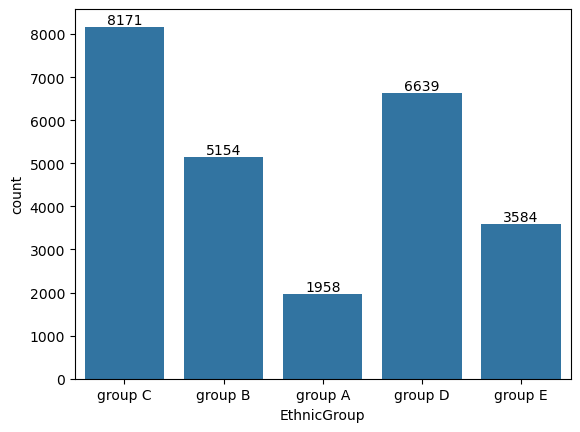

In [22]:
#Graph before mode imputation:

ax=sns.countplot(df_mode,x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar)


In [23]:
# imputing values:

df_mode['EthnicGroup'].fillna(mode_eg,inplace=True)

In [24]:
df_mode['EthnicGroup'].isnull().sum()

0

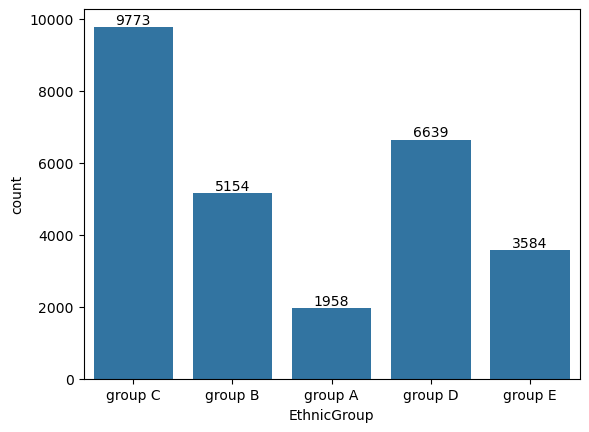

In [25]:
# Graph after mode imputation:

ax=sns.countplot(df_mode,x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar)

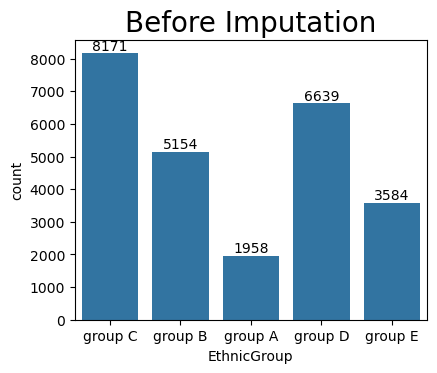

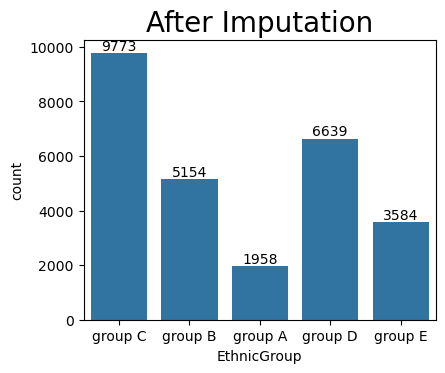

In [26]:
#Graphs before and after imputation:

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='EthnicGroup')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_mode,x='EthnicGroup')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Mode imputation on ParentEduc column :             

In [27]:
mode_pe=df_mode['ParentEduc'].mode()[0]
print(mode_pe)

some college


In [28]:
df_mode['ParentEduc'].value_counts()

ParentEduc
some college          5890
high school           5051
associate's degree    4921
some high school      4862
bachelor's degree     2986
master's degree       1783
Name: count, dtype: int64

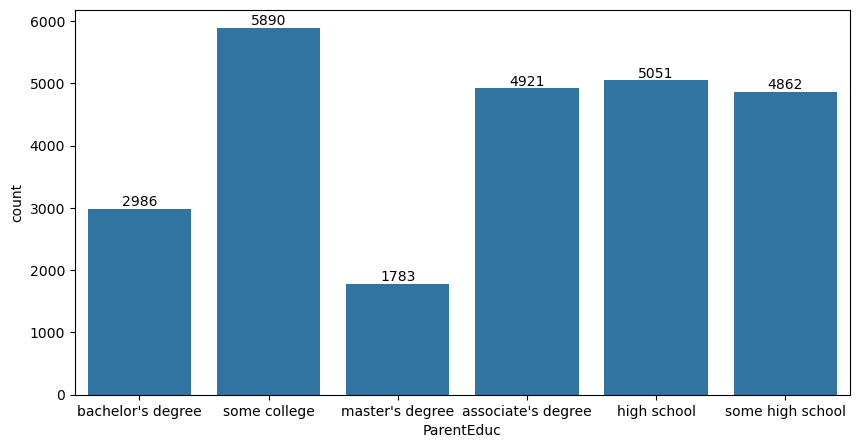

In [29]:
#Graph before imputation:

plt.figure(figsize=(10,5))
ax=sns.countplot(df_mode,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar)
    

In [30]:
# imputing values:

df_mode['ParentEduc'].fillna(mode_pe,inplace=True)

In [31]:
df_mode['ParentEduc'].isnull().sum()

0

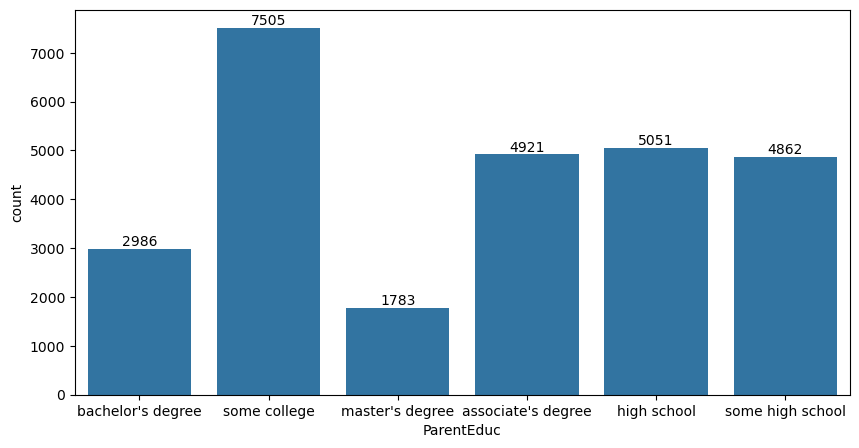

In [32]:
# Graph after imputation:

plt.figure(figsize=(10,5))
ax=sns.countplot(df_mode,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar)

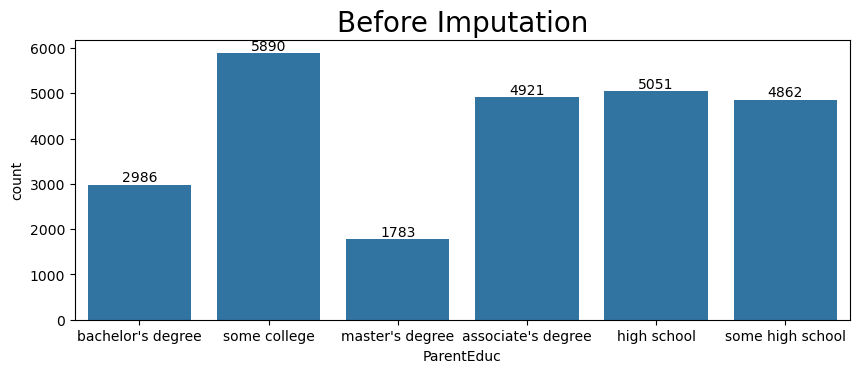

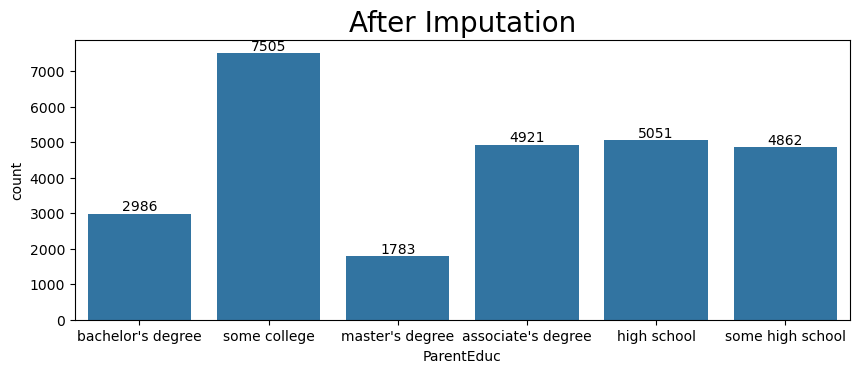

In [33]:
#Graphs before and after imputation:

plt.figure(figsize=(22,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='ParentEduc')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(22,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_mode,x='ParentEduc')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Mode imputation on TestPrep column:

In [34]:
mode_tp=df_mode['TestPrep'].mode()[0]
print(mode_tp)

none


In [35]:
# imputing values:

df_mode['TestPrep'].value_counts()

TestPrep
none         16731
completed     8759
Name: count, dtype: int64

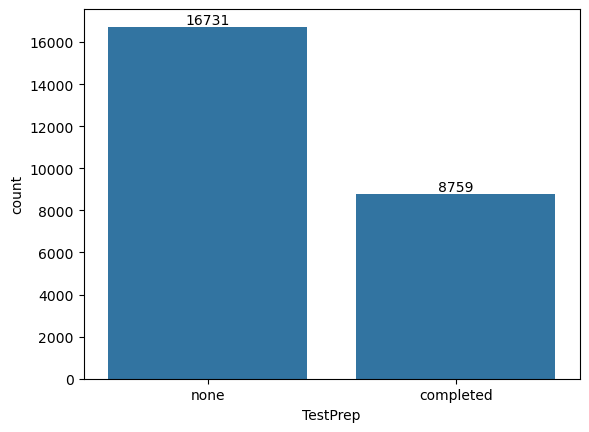

In [36]:
#Graph before imputation:

ax=sns.countplot(df_mode,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar)

In [37]:
# imputing values:

df_mode['TestPrep'].fillna(mode_tp,inplace=True)

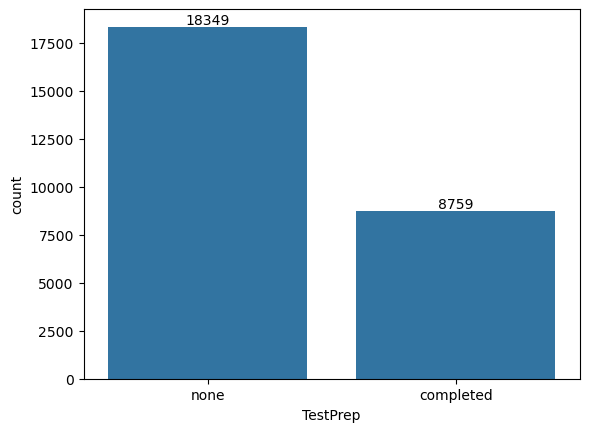

In [38]:
# Graph after imputation:

ax=sns.countplot(df_mode,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar)

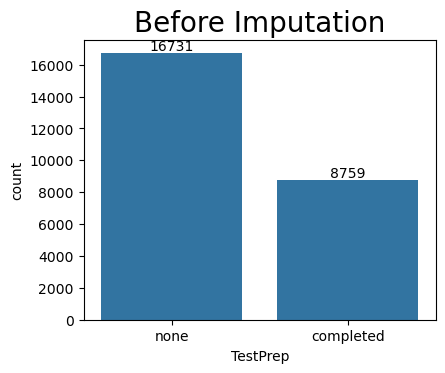

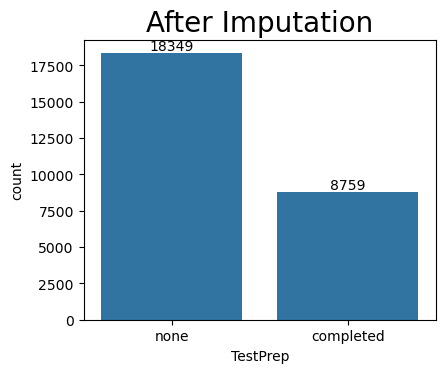

In [39]:
#Graphs before and after imputation:

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='TestPrep')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_mode,x='TestPrep')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Mode imputation on TransportMeans column:

In [40]:
mode_tm=df_mode['TransportMeans'].mode()[0]
print(mode_tm)

school_bus


In [41]:
df_mode['TransportMeans'].value_counts()

TransportMeans
school_bus    14256
private       10081
Name: count, dtype: int64

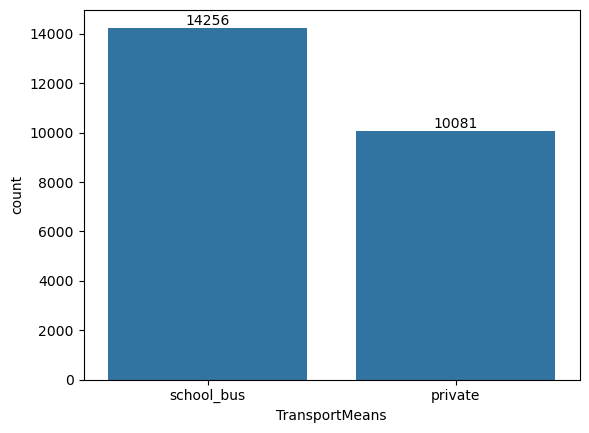

In [42]:
#Graph before imputation:

ax=sns.countplot(df_mode,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar)

In [43]:
# imputing values:

df_mode['TransportMeans'].fillna(mode_tm,inplace=True)

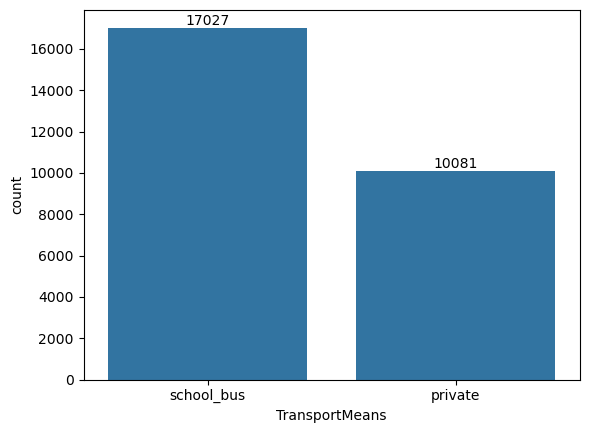

In [44]:
# Graph after imputation:

ax=sns.countplot(df_mode,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar)

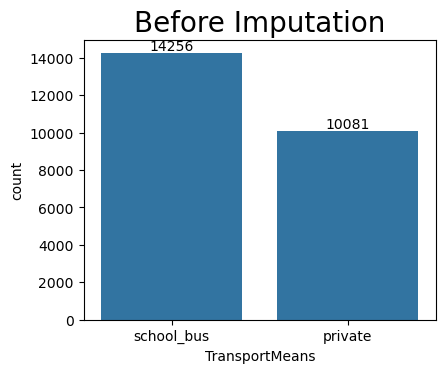

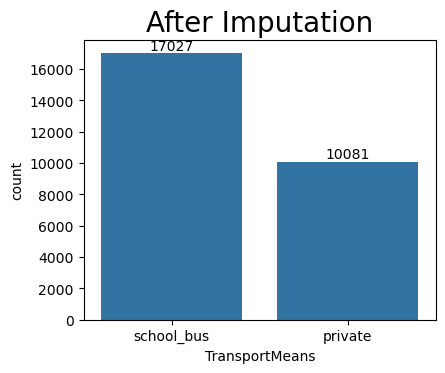

In [45]:
#Graphs before and after imputation:

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='TransportMeans')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_mode,x='TransportMeans')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Mode imputation on NrSiblings column:

In [46]:
df_mode2=df[numerical].copy()
df_mode2.head(10)

,NrSiblings,MathScore,ReadingScore,WritingScore
0,3.0,71,71,74
1,0.0,69,90,88
2,4.0,87,93,91
3,1.0,45,56,42
4,0.0,76,78,75
5,1.0,73,84,79
6,1.0,85,93,89
7,1.0,41,43,39
8,3.0,65,64,68
9,NaN,37,59,50


In [47]:
df['NrSiblings'].value_counts()

NrSiblings
1.0    7263
2.0    6038
3.0    5451
0.0    2661
4.0    2603
5.0    1173
6.0     266
7.0     265
Name: count, dtype: int64

In [48]:
mode_nr=df_mode2['NrSiblings'].mode()[0]
print(mode_nr)

1.0


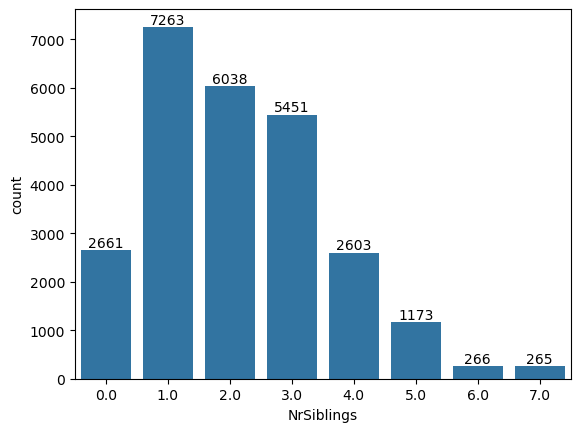

In [49]:
#Graph before imputation:

ax=sns.countplot(df,x='NrSiblings')
for bar in ax.containers:
    ax.bar_label(bar)

In [50]:
# imputing values:

df_mode2['NrSiblings'].fillna(mode_nr,inplace=True)

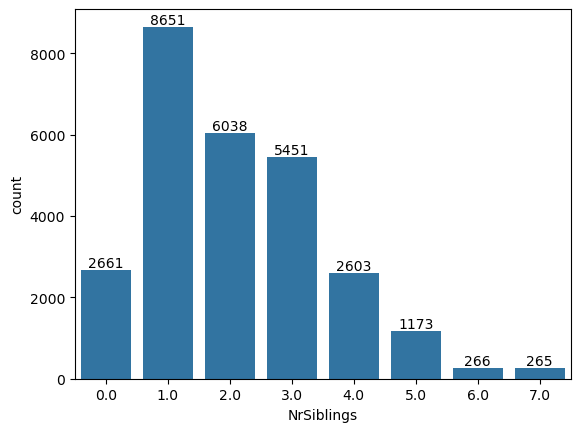

In [51]:
#Graph after imputation:

ax=sns.countplot(df_mode2,x='NrSiblings')
for bar in ax.containers:
    ax.bar_label(bar)

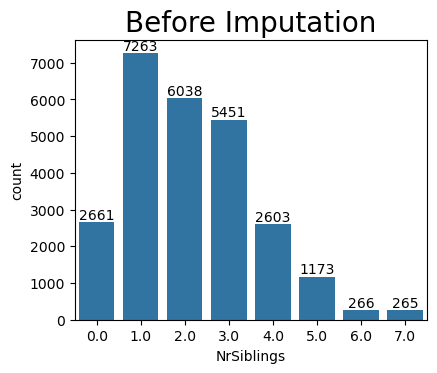

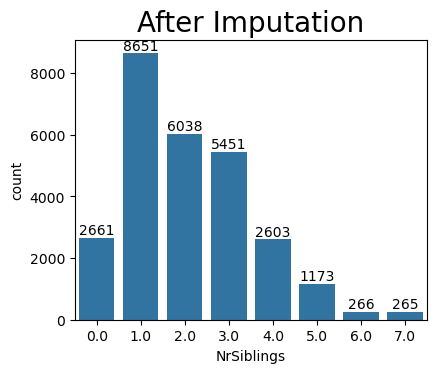

In [52]:
#Graph before and after imputation:

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='NrSiblings')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_mode2,x='NrSiblings')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()


# <center>=====Random Value imputation=====</center> 

In [53]:
df.isnull().sum()

Gender                    0
EthnicGroup            1602
ParentEduc             1615
LunchType                 0
TestPrep               1618
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
NrSiblings             1388
TransportMeans         2771
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [54]:
print(categorical)

['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']


In [55]:
df_ran=df[categorical].copy()
df_ran.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,school_bus,< 5
1,female,group C,some college,standard,NaN,married,sometimes,yes,NaN,5 - 10
2,female,group B,master's degree,standard,none,single,sometimes,yes,school_bus,< 5
3,male,group A,associate's degree,free/reduced,none,married,never,no,NaN,5 - 10
4,male,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10


# random value imputation on EthnicGroup column:

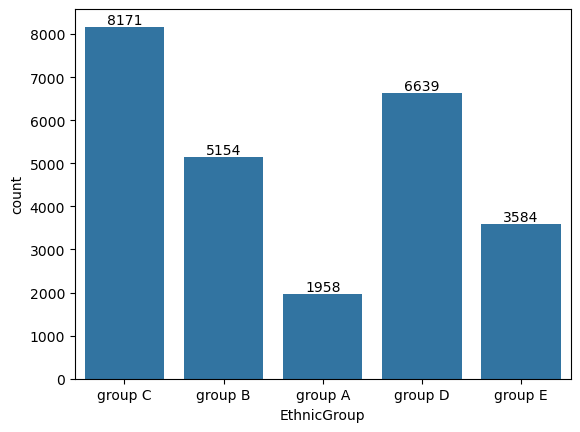

In [56]:
# Graph before imputation:
ax=sns.countplot(df_ran,x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar)

In [57]:
df['EthnicGroup'].value_counts()

EthnicGroup
group C    8171
group D    6639
group B    5154
group E    3584
group A    1958
Name: count, dtype: int64

In [58]:
# total values after droping nan:
total_values=df['EthnicGroup'].dropna().shape[0]
print(total_values)

25506


In [59]:
# total values of group c:
group_C=df[df['EthnicGroup']=='group C'].shape[0]
print(group_C)

8171


In [60]:
# total values of group D:
group_D=df[df['EthnicGroup']=='group D'].shape[0]
print(group_D)

6639


In [61]:
# total values of group c:
group_B=df[df['EthnicGroup']=='group B'].shape[0]
print(group_B)

5154


In [62]:
# total values of group c:
group_E=df[df['EthnicGroup']=='group E'].shape[0]
print(group_E)

3584


In [63]:
# total values of group c:
group_A=df[df['EthnicGroup']=='group A'].shape[0]
print(group_A)

1958


In [64]:
#  Finding probablities of all values
pro_groupC=group_C/total_values
pro_groupD=group_D/total_values
pro_groupB=group_B/total_values
pro_groupE=group_E/total_values
pro_groupA=group_A/total_values

print(pro_groupC)
print(pro_groupD)
print(pro_groupB)
print(pro_groupE)
print(pro_groupA)

0.32035599466792125
0.2602916960715126
0.20207010115266996
0.1405159570297185
0.07676625107817768


In [65]:
labels=df_ran['EthnicGroup'].value_counts().index
print(labels)

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object', name='EthnicGroup')


In [66]:
# imputing values
df_ran['EthnicGroup'].fillna(np.random.choice(labels,p=(pro_groupC,pro_groupD,pro_groupB,pro_groupE,pro_groupA))
,inplace=True)

In [67]:
df_ran['EthnicGroup'].isnull().sum()

0

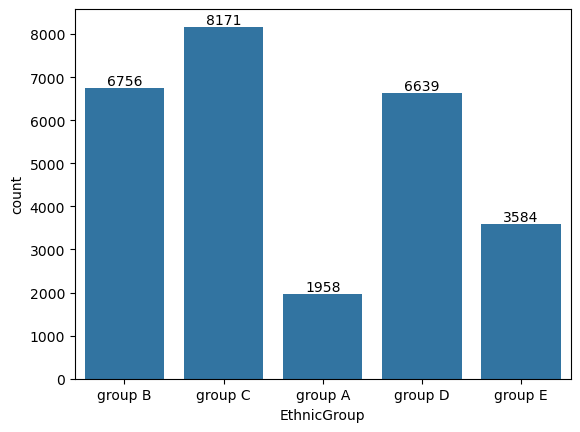

In [68]:
# Graph after imputation:
ax=sns.countplot(df_ran,x='EthnicGroup')
for bar in ax.containers:
    ax.bar_label(bar)

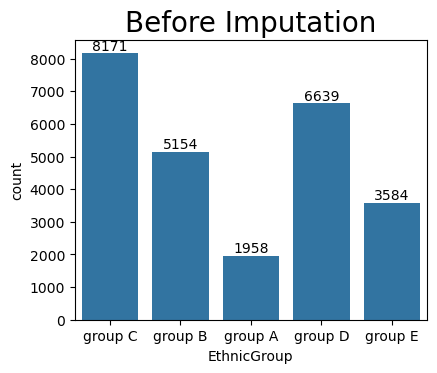

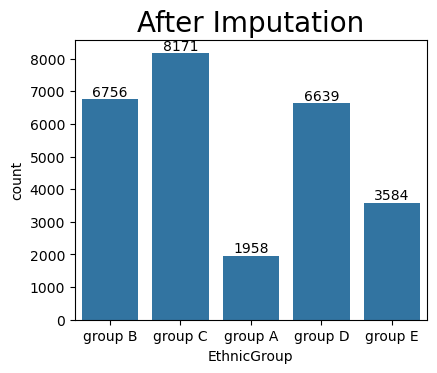

In [69]:
#Graphs before and after imputation:

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='EthnicGroup')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_ran,x='EthnicGroup')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Random value imputation on ParentEduc column:

In [70]:
df_ran.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc             1615
LunchType                 0
TestPrep               1618
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
TransportMeans         2771
WklyStudyHours            0
dtype: int64

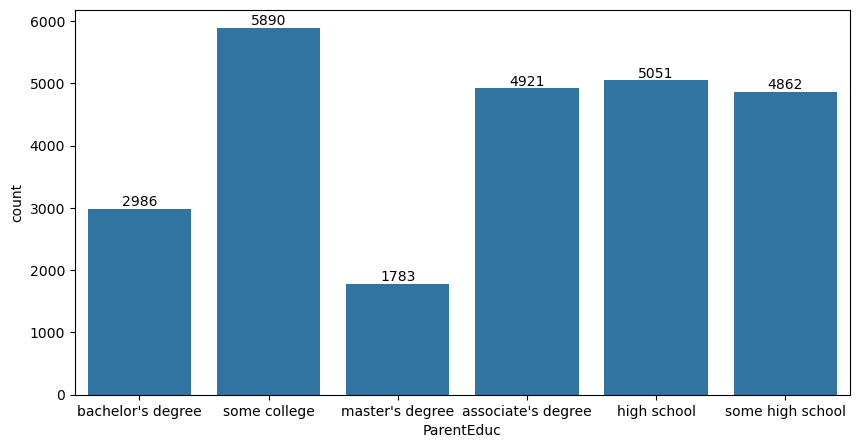

In [71]:
# Graph before imputation:
plt.figure(figsize=(10,5))
ax=sns.countplot(df_ran,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar)

In [72]:
#total values after droping nan
total_values=df['ParentEduc'].dropna().shape[0]
print(total_values)

25493


In [73]:
df_ran['ParentEduc'].value_counts()

ParentEduc
some college          5890
high school           5051
associate's degree    4921
some high school      4862
bachelor's degree     2986
master's degree       1783
Name: count, dtype: int64

In [74]:
some_col=df[df['ParentEduc']=='some college'].shape[0]
print(some_col)

5890


In [75]:
high_schl=df[df['ParentEduc']=='high school'].shape[0]
print(high_schl)

5051


In [76]:
asso_degree=df[df['ParentEduc']=="associate's degree"].shape[0]
print(asso_degree)

4921


In [77]:
some_hig_schl=df[df['ParentEduc']=='some high school'].shape[0]
print(some_hig_schl)

4862


In [78]:
bac_degree=df[df['ParentEduc']=="bachelor's degree"].shape[0]
print(bac_degree)

2986


In [79]:
mas_degree=df[df['ParentEduc']=="master's degree"].shape[0]
print(mas_degree)

1783


In [80]:
# probablities of all values:
pro_some_col=some_col/total_values

pro_high_schl=high_schl/total_values

pro_asso_degree=asso_degree/total_values

pro_some_hig_schl=some_hig_schl/total_values

pro_bac_degree=bac_degree/total_values

pro_mas_degree=mas_degree/total_values

In [81]:
print(pro_some_col)
print(pro_high_schl)
print(pro_asso_degree)
print(pro_some_hig_schl)
print(pro_bac_degree)
print(pro_mas_degree)

0.23104381594947632
0.1981328207743302
0.193033381712627
0.19071902090770015
0.11713019260189071
0.0699407680539756


In [82]:
labels=df['ParentEduc'].value_counts().index
print(labels)

Index(['some college', 'high school', 'associate's degree', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object', name='ParentEduc')


In [83]:
# imputing values
df_ran['ParentEduc'].fillna(np.random.choice(labels,p=(pro_some_col,pro_high_schl,pro_asso_degree,pro_some_hig_schl
,pro_bac_degree,pro_mas_degree)),inplace=True)


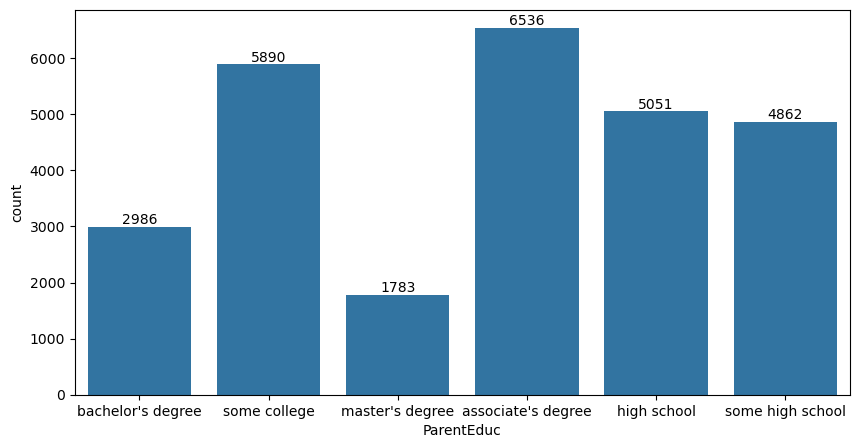

In [84]:
# Graph after imputation:
plt.figure(figsize=(10,5))
ax=sns.countplot(df_ran,x='ParentEduc')
for bar in ax.containers:
    ax.bar_label(bar)

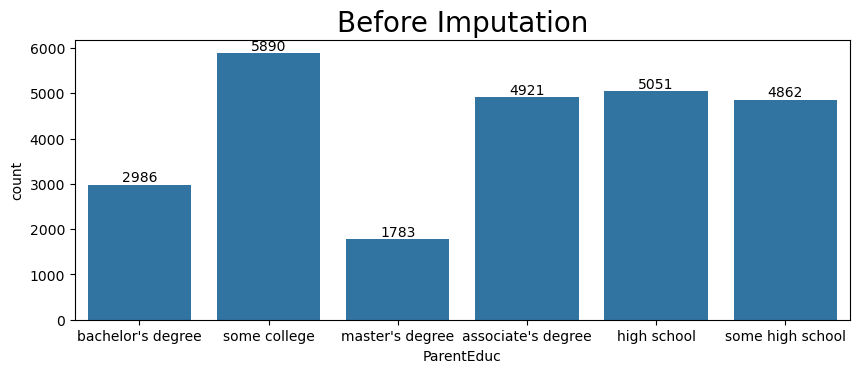

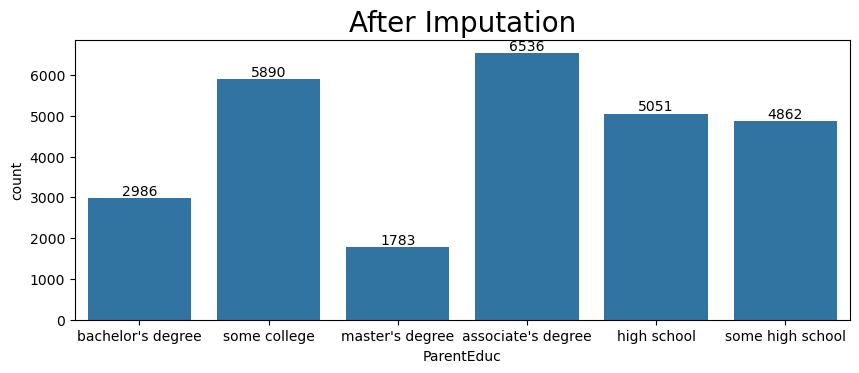

In [85]:
#Graphs before and after imputation:

plt.figure(figsize=(22,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='ParentEduc')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(22,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_ran,x='ParentEduc')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Random value imputation on TestPrep column:

In [86]:
df_ran.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep               1618
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
TransportMeans         2771
WklyStudyHours            0
dtype: int64

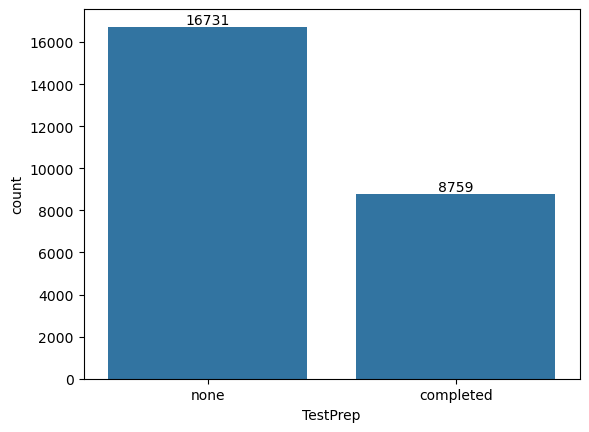

In [87]:
# Graph before imputation:
ax=sns.countplot(df_ran,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar)

In [88]:
#total values after droping nan:
total_values=df['TestPrep'].dropna().shape[0]
print(total_values)

25490


In [89]:
df_ran['TestPrep'].value_counts()

TestPrep
none         16731
completed     8759
Name: count, dtype: int64

In [90]:
none=df[df['TestPrep']=='none'].shape[0]
print(none)

16731


In [91]:
completed=df[df['TestPrep']=='completed'].shape[0]
print(completed)

8759


In [92]:
# probablities of all values:
pro_none=none/total_values

pro_completed=completed/total_values

In [93]:
print(pro_none)
print(pro_completed)

0.6563750490388388
0.34362495096116125


In [94]:
labels=df['TestPrep'].value_counts().index
print(labels)

Index(['none', 'completed'], dtype='object', name='TestPrep')


In [95]:
# Imputing values:
df_ran['TestPrep'].fillna(np.random.choice(labels,p=(pro_none,pro_completed)),inplace=True)

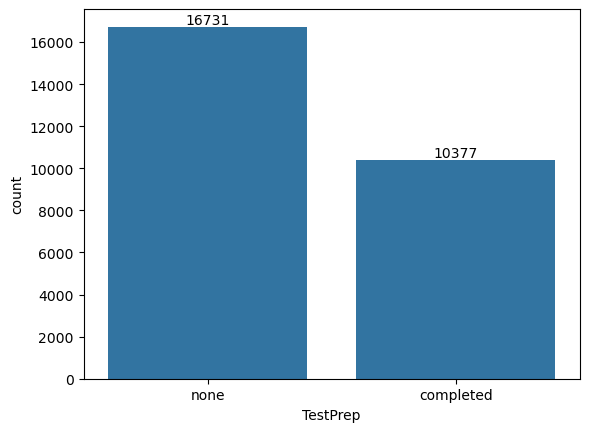

In [96]:
# Graph after imputation:
ax=sns.countplot(df_ran,x='TestPrep')
for bar in ax.containers:
    ax.bar_label(bar)

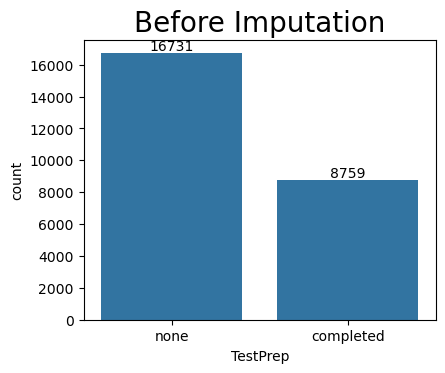

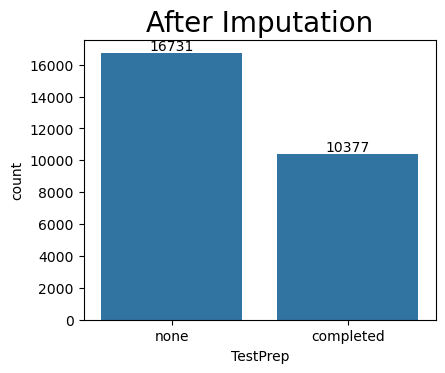

In [97]:
#Graphs before and after imputation:

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='TestPrep')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_ran,x='TestPrep')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Random value imputation on TransportMeans column:

In [98]:
df_ran.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep                  0
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
TransportMeans         2771
WklyStudyHours            0
dtype: int64

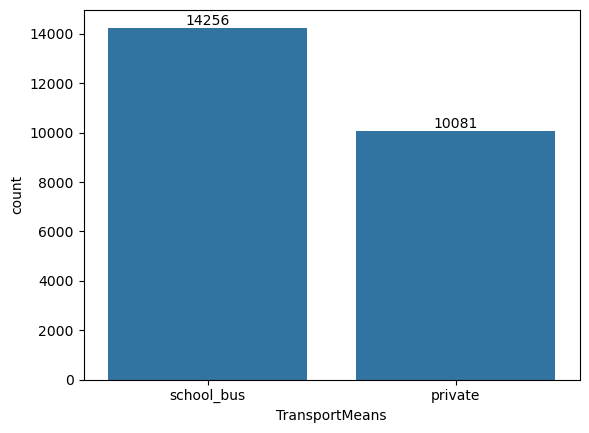

In [99]:
# Graph before imputation:
ax=sns.countplot(df_ran,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar)

In [100]:
#total values after droping nan:
total_values=df['TransportMeans'].dropna().shape[0]
print(total_values)

24337


In [101]:
df['TransportMeans'].value_counts()

TransportMeans
school_bus    14256
private       10081
Name: count, dtype: int64

In [102]:
schl_bus=df[df['TransportMeans']=='school_bus'].shape[0]
schl_bus

14256

In [103]:
private=df[df['TransportMeans']=='private'].shape[0]
private

10081

In [104]:
# probablities of values:
pro_schl_bus=schl_bus/total_values

pro_private=private/total_values

In [105]:
print(pro_schl_bus)
print(pro_private)

0.5857747462711098
0.4142252537288902


In [106]:
labels=df['TransportMeans'].value_counts().index
print(labels)

Index(['school_bus', 'private'], dtype='object', name='TransportMeans')


In [107]:
# imputing values:
df_ran['TransportMeans'].fillna(np.random.choice(labels,p=(pro_schl_bus,pro_private)),inplace=True)

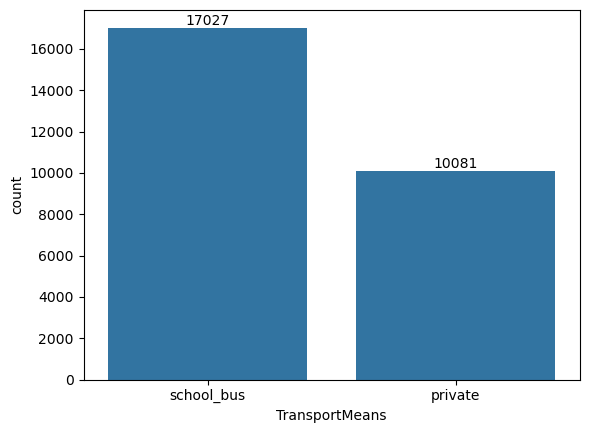

In [108]:
# Graph after imputation:
ax=sns.countplot(df_ran,x='TransportMeans')
for bar in ax.containers:
    ax.bar_label(bar)

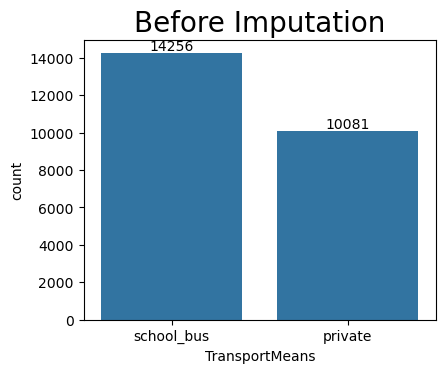

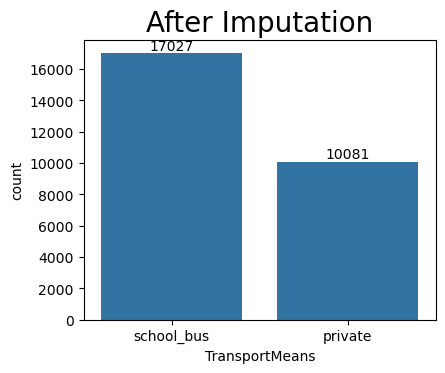

In [109]:
# Graphs before and after  imputation:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='TransportMeans')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_ran,x='TransportMeans')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

In [110]:
df_ran.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
TransportMeans         0
WklyStudyHours         0
dtype: int64

# Random value imputation on NrSiblings column:

In [111]:
df_ran2=df[numerical].copy()
df_ran2.head(10)

,NrSiblings,MathScore,ReadingScore,WritingScore
0,3.0,71,71,74
1,0.0,69,90,88
2,4.0,87,93,91
3,1.0,45,56,42
4,0.0,76,78,75
5,1.0,73,84,79
6,1.0,85,93,89
7,1.0,41,43,39
8,3.0,65,64,68
9,NaN,37,59,50


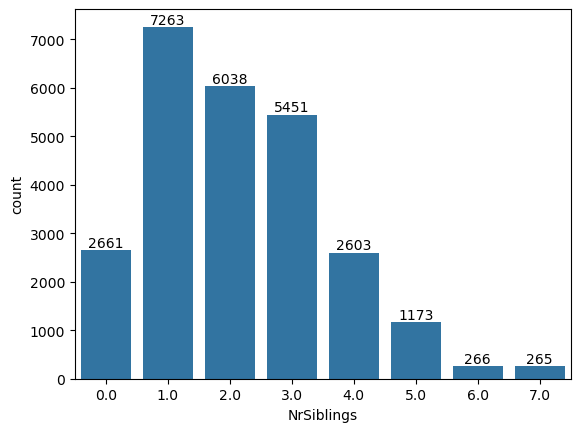

In [112]:
# Graph before imputation:

ax=sns.countplot(df,x='NrSiblings')
for bar in ax.containers:
    ax.bar_label(bar)

In [113]:
#total values after droping nan:

total_values=df['NrSiblings'].dropna().shape[0]
print(total_values)

25720


In [114]:
df['NrSiblings'].value_counts()

NrSiblings
1.0    7263
2.0    6038
3.0    5451
0.0    2661
4.0    2603
5.0    1173
6.0     266
7.0     265
Name: count, dtype: int64

In [115]:
one_child=df[df['NrSiblings']==1.0].shape[0]
one_child

7263

In [116]:
two_child=df[df['NrSiblings']==2.0].shape[0]
two_child

6038

In [117]:
three_child=df[df['NrSiblings']==3.0].shape[0]
three_child

5451

In [118]:
zero_child=df[df['NrSiblings']==0.0].shape[0]
zero_child

2661

In [119]:
four_child=df[df['NrSiblings']==4.0].shape[0]
four_child

2603

In [120]:
five_child=df[df['NrSiblings']==5.0].shape[0]
five_child

1173

In [121]:
six_child=df[df['NrSiblings']==6.0].shape[0]
six_child

266

In [122]:
sev_child=df[df['NrSiblings']==7.0].shape[0]
sev_child

265

In [123]:
# Probablities of values:

pro_one_child=one_child/total_values

pro_two_child=two_child/total_values

pro_three_child=three_child/total_values

pro_zero_child=zero_child/total_values

pro_four_child=four_child/total_values

pro_five_child=five_child/total_values

pro_six_child=six_child/total_values

pro_sev_child=sev_child/total_values

In [124]:
print(pro_one_child)
print(pro_two_child)
print(pro_three_child)
print(pro_four_child)
print(pro_five_child)
print(pro_six_child)
print(pro_sev_child)


0.2823872472783826
0.23475894245723172
0.21193623639191292
0.10120528771384137
0.045606531881804045
0.010342146189735614
0.010303265940902022


In [125]:
labels=df['NrSiblings'].value_counts().index
print(labels)

Index([1.0, 2.0, 3.0, 0.0, 4.0, 5.0, 6.0, 7.0], dtype='float64', name='NrSiblings')


In [126]:
# imputing values:

df_ran2['NrSiblings'].fillna(np.random.choice(labels,p=(pro_one_child,pro_two_child,pro_three_child,pro_zero_child
                                                        ,pro_four_child,pro_five_child,pro_six_child,pro_sev_child))
                             ,inplace=True)

In [127]:
df_ran2.isnull().sum()

NrSiblings      0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

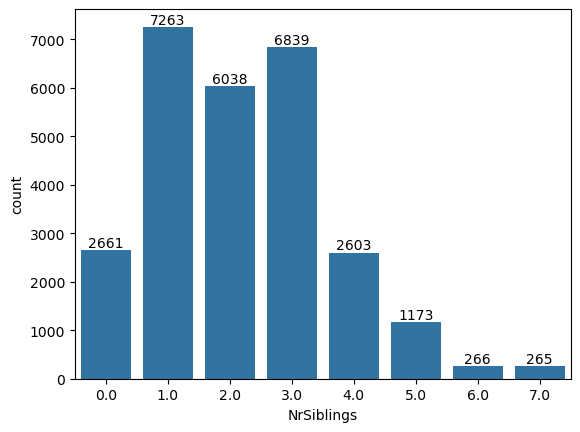

In [128]:
#Graph after imputation:

ax=sns.countplot(df_ran2,x='NrSiblings')
for bar in ax.containers:
    ax.bar_label(bar)

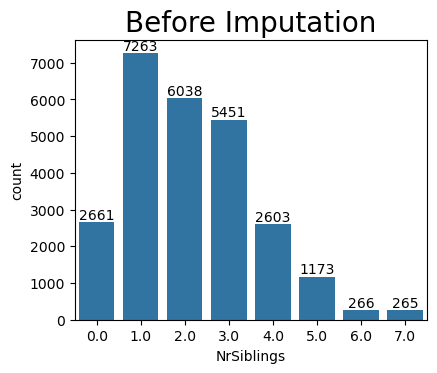

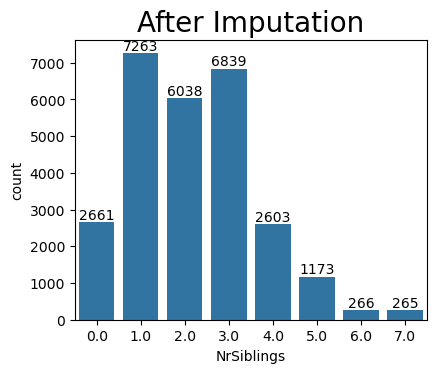

In [129]:
# Graphs before and after  imputation:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df,x='NrSiblings')
plt.title('Before Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax=sns.countplot(df_ran2,x='NrSiblings')
plt.title('After Imputation',size=20)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

#  Filling nan values by Missing indicater

In [130]:
df[categorical].isnull().sum()

Gender                    0
EthnicGroup            1602
ParentEduc             1615
LunchType                 0
TestPrep               1618
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
TransportMeans         2771
WklyStudyHours            0
dtype: int64

In [131]:
df_missing=df[categorical].copy()
df_missing.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,school_bus,< 5
1,female,group C,some college,standard,NaN,married,sometimes,yes,NaN,5 - 10
2,female,group B,master's degree,standard,none,single,sometimes,yes,school_bus,< 5
3,male,group A,associate's degree,free/reduced,none,married,never,no,NaN,5 - 10
4,male,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10


 Missing indicater on EthnicGroup

In [132]:
df_missing['EthnicGroup'].fillna('Missing',inplace=True)

Missing indicater on Parenteduc

In [133]:
df_missing['ParentEduc'].fillna('Missing',inplace=True)

 Missing indicater on TestPrep

In [134]:
df_missing['TestPrep'].fillna('Missing',inplace=True)

Missing indicater on TransportMeans

In [135]:
df_missing['TransportMeans'].fillna('Missing',inplace=True)

In [136]:
df_missing.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
TransportMeans         0
WklyStudyHours         0
dtype: int64

Missing indicater on NrSiblings

In [137]:
df_missing_num=df[numerical].copy()
df_missing_num.head(10)

,NrSiblings,MathScore,ReadingScore,WritingScore
0,3.0,71,71,74
1,0.0,69,90,88
2,4.0,87,93,91
3,1.0,45,56,42
4,0.0,76,78,75
5,1.0,73,84,79
6,1.0,85,93,89
7,1.0,41,43,39
8,3.0,65,64,68
9,NaN,37,59,50


In [138]:
df_missing_num['NrSiblings'].fillna("Missing",inplace=True)

In [139]:
df_missing_num.isnull().sum()

NrSiblings      0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

# <center>====== Outliers ======</center>

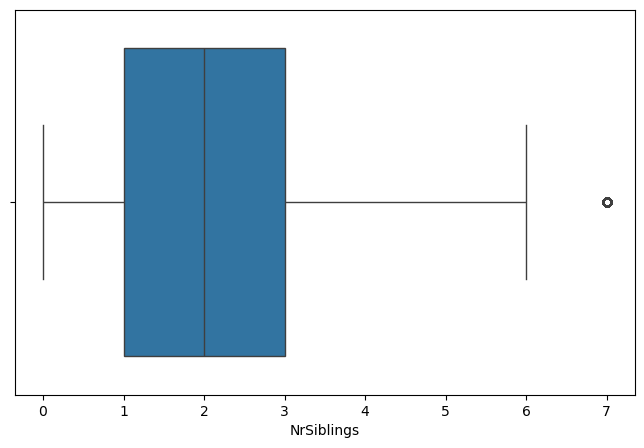

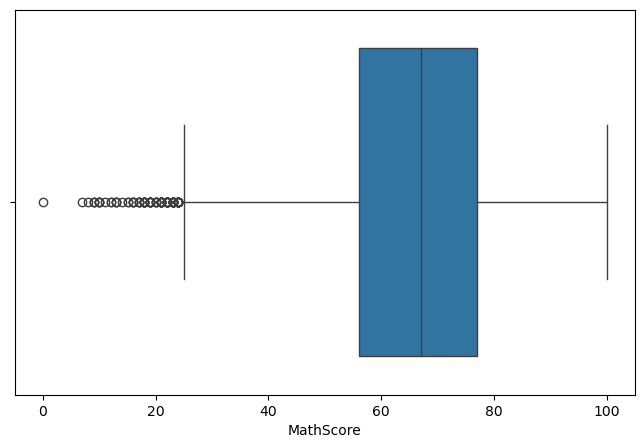

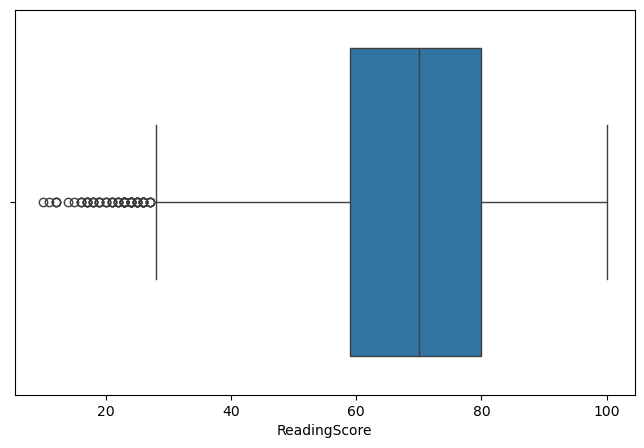

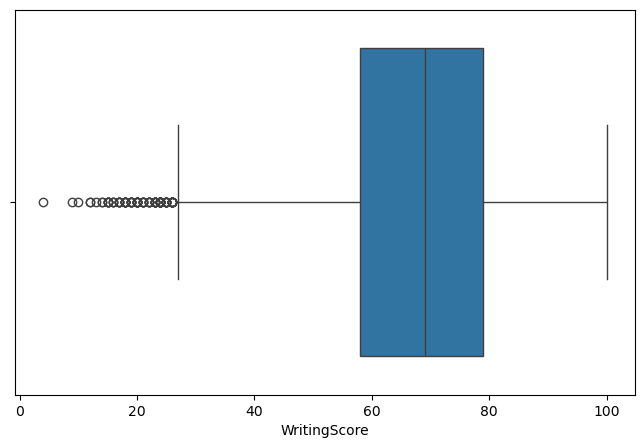

In [140]:
for num in numerical:
    plt.figure(figsize=(8,5))
    sns.boxplot(df,x=num)

In [141]:
cols=['MathScore','ReadingScore','WritingScore']

In [142]:
df[cols].describe()

,MathScore,ReadingScore,WritingScore
count,27108.000000,27108.000000,27108.000000
mean,66.552125,69.394349,68.428951
std,15.329953,14.738508,15.430644
min,0.000000,10.000000,4.000000
25%,56.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [143]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [144]:
numerical

['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

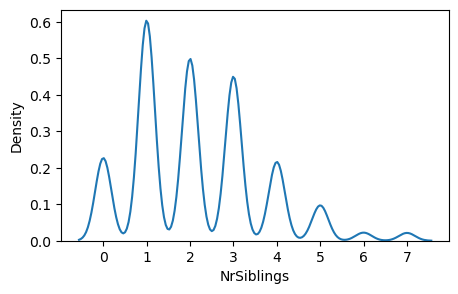

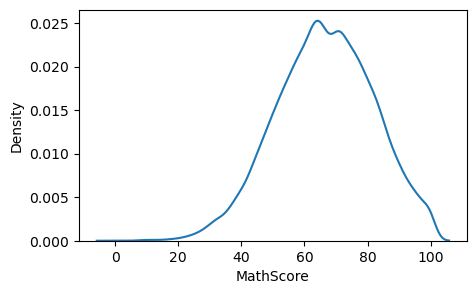

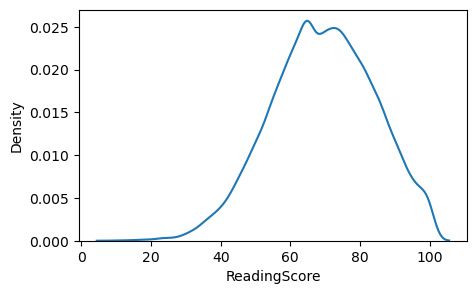

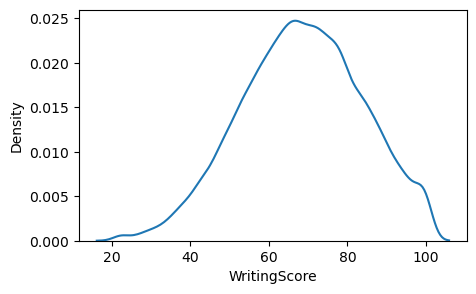

In [187]:
#Distribution of data before handling outlier:

for num in numerical:
    plt.figure(figsize=(5,3))
    sns.kdeplot(df,x=num)

# Outlier Detection using Boundary Values on MathScore col:

# Boundary Values

In [146]:
for col in cols: 
    print(f"Upper value for {col}: {df[col].mean()+3*df[col].std()}")
    print()
    print(f"Lower value for {col}: {df[col].mean()-3*df[col].std()}")
    print("="*80)     

Upper value for MathScore: 112.54198440063867

Lower value for MathScore: 20.56226526735601
Upper value for ReadingScore: 113.60987177818217

Lower value for ReadingScore: 25.178825285415286
Upper value for WritingScore: 114.72088301971088

Lower value for WritingScore: 22.137018706716745


In [147]:
# Upper Boundary Value for MathScore:
ms_upper=df['MathScore'].mean()+3*df['MathScore'].std()

# Lower Boundary Value for MathScore:
ms_lower=df['MathScore'].mean()-3*df['MathScore'].std()
print("Upper_value" "=", ms_upper)
print("Lower_value" "=", ms_lower)

Upper_value= 112.54198440063867
Lower_value= 20.56226526735601


In [148]:
#Finding outliers in 'MathScore:
df[(df['MathScore']>ms_upper) | (df['MathScore']<ms_lower)].head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
17,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,18,32,28
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
751,female,group B,some college,standard,none,single,regularly,no,4.0,private,< 5,18,37,32
928,female,group B,high school,free/reduced,none,married,sometimes,yes,1.0,private,5 - 10,8,24,23
3283,female,NaN,some high school,free/reduced,none,married,sometimes,no,2.0,private,5 - 10,17,36,28


In [149]:
#Number of outliers
df[(df['MathScore']>ms_upper) | (df['MathScore']<ms_lower)].shape

(46, 14)

Trimming

In [150]:
#Gathering normal values in Mathscore:
trimmed_df=df[(df["MathScore"]<ms_upper) & (df['MathScore']>ms_lower)]
trimmed_df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [151]:
trimmed_df.shape

(27062, 14)

 Capping

In [152]:
# Now filling ms_upper where values are greater than ms_upper and filling ms_lower where values are smaller than
# ms_lower
# np.where(condition,value_if_True,value_if_False):
df['MathScore']=np.where(df['MathScore']>ms_upper,
                                           ms_upper,
                                           np.where(df['MathScore']<ms_lower,
                                                    ms_lower,
                                                    df['MathScore']))

Text(0.5, 1.0, 'After')

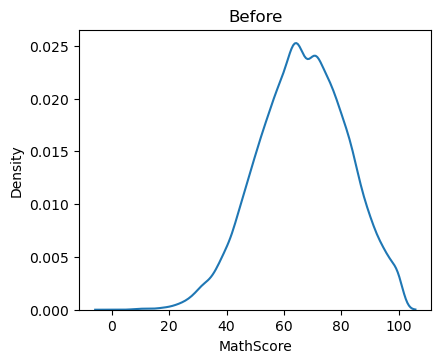

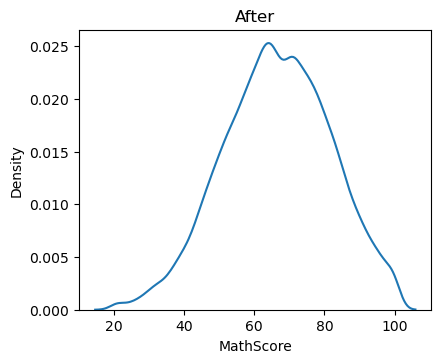

In [153]:
#Distribution of data before and after handling outlier:

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.kdeplot(data,x='MathScore')
plt.title("Before")

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.kdeplot(df,x="MathScore")
plt.title("After")

# IQR Method on ReadingScore col:

In [154]:
df=data.copy()

In [155]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [156]:
df.drop('Unnamed: 0',axis=1,inplace=True)

 Finding IQR

In [157]:
# Calculating 25 and 75 quartile of data:
pcile25=df['ReadingScore'].quantile(0.25)
pcile75=df['ReadingScore'].quantile(0.75)

In [158]:
print(pcile25)
print()
print(pcile75)

59.0

80.0


In [159]:
# Calculating IQR:
iqr=pcile75-pcile25
print(iqr)

21.0


In [160]:
# Calculating upper and lower limits:
upper_limit=pcile75+1.5*iqr
lower_limit=pcile25-1.5*iqr

In [161]:
print(pcile75)
print()
print(pcile25)

80.0

59.0


In [162]:
#Count of outliers:
df[(df['ReadingScore']>upper_limit) | (df['ReadingScore']<lower_limit)].head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,NaN,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
928,female,group B,high school,free/reduced,none,married,sometimes,yes,1.0,private,5 - 10,8,24,23


In [163]:
#Count of outliers:
df[(df['ReadingScore']>upper_limit) | (df['ReadingScore']<lower_limit)].shape

(90, 14)

Trimming

In [164]:
#Calculating normal values:
trimmed_df=df[(df['ReadingScore']<=upper_limit) & (df['ReadingScore']>=lower_limit)]
print(trimmed_df.shape)

(30551, 14)


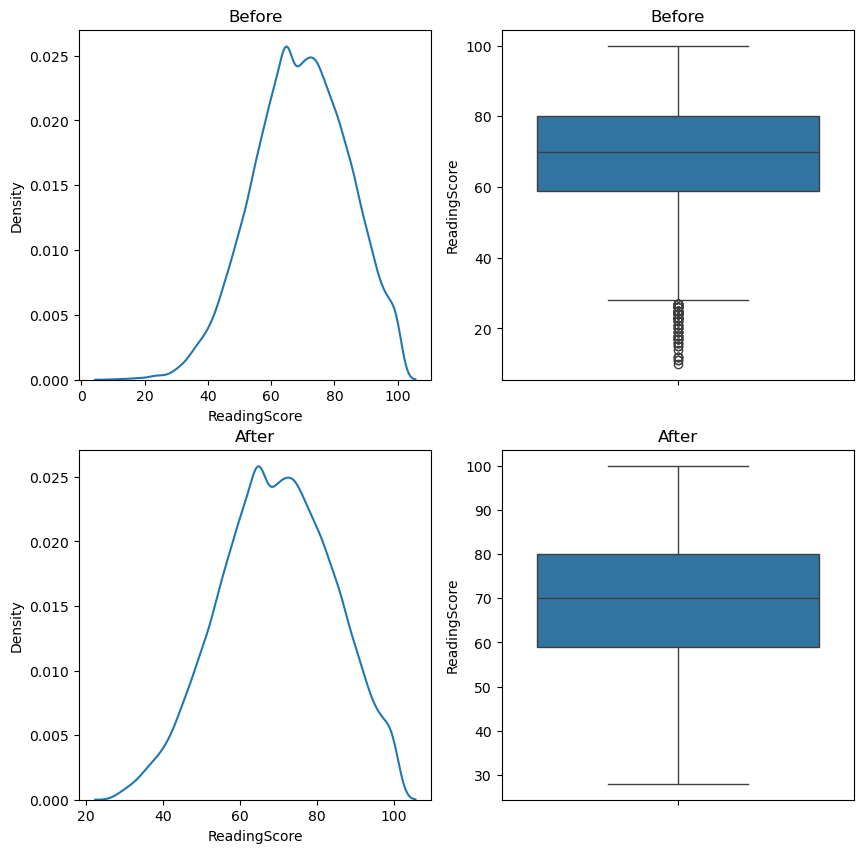

In [165]:
# Distribution of data before and after handling outliers:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(data['ReadingScore'])
plt.title("Before")

plt.subplot(2,2,2)
sns.boxplot(data['ReadingScore'])
plt.title("Before")

plt.subplot(2,2,3)
sns.kdeplot(trimmed_df['ReadingScore'])
plt.title("After")

plt.subplot(2,2,4)
sns.boxplot(trimmed_df['ReadingScore'])
plt.title("After")

plt.show()

# IQR Method on WritingScore col:

In [166]:
df=data.copy()
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [167]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [168]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


 Finding IQR

In [169]:
# Calculating 25 and 75 quartile of data:
pcile25=df['WritingScore'].quantile(0.25)
pcile75=df['WritingScore'].quantile(0.75)

In [170]:
print(pcile25)
print()
print(pcile75)

58.0

79.0


In [171]:
# Calculating IQR:
iqr=pcile75-pcile25
print(iqr)

21.0


In [172]:
# Calculating upper and lower limits:
upper_limit=pcile75+1.5*iqr
lower_limit=pcile25-1.5*iqr

In [173]:
print(upper_limit)
print()
print(lower_limit)

110.5

26.5


In [174]:
#Count of outliers:
df[(df['WritingScore']>upper_limit) | (df['WritingScore']<lower_limit)].head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,NaN,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
319,female,group B,some high school,free/reduced,none,single,sometimes,no,3.0,school_bus,< 5,23,37,26
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15


In [175]:
#Count of outliers:
df[(df['WritingScore']>upper_limit) | (df['WritingScore']<lower_limit)].shape

(109, 14)

Trimming

In [176]:
#Calculating normal values:
trimmed_df=df[(df['WritingScore']<=upper_limit) & (df['WritingScore']<=lower_limit)]
print(trimmed_df.shape)

(109, 14)


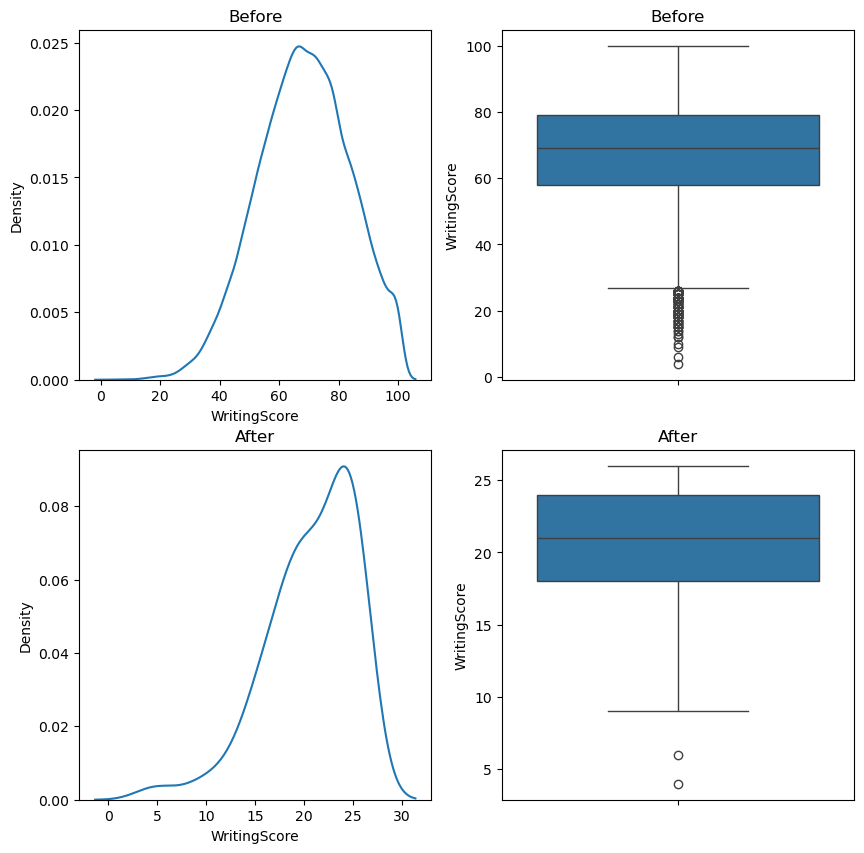

In [177]:
# Distribution of data before and after handling outliers:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(data['WritingScore'])
plt.title("Before")

plt.subplot(2,2,2)
sns.boxplot(data['WritingScore'])
plt.title("Before")

plt.subplot(2,2,3)
sns.kdeplot(trimmed_df['WritingScore'])
plt.title("After")

plt.subplot(2,2,4)
sns.boxplot(trimmed_df['WritingScore'])
plt.title("After")

plt.show()

# Outlier Detection using Boundary Values on WritingScore col:

In [178]:
df=data.copy()
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [179]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [180]:
# Upper Boundary Value for WritingScore:
ws_upper=df['WritingScore'].mean()+3*df['WritingScore'].std()

# Lower Boundary Value for WritingScore:
ws_lower=df['WritingScore'].mean()-3*df['WritingScore'].std()

print(ws_upper)
print()
print(ws_lower)

114.74919655042783

22.08804766483931


In [181]:
#Finding outliers in WritingScore:
df[(df['WritingScore']>ws_upper) | (df['WritingScore']<ws_lower)].head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,NaN,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
1484,male,group B,some high school,free/reduced,none,single,sometimes,yes,1.0,private,> 10,30,21,17


In [182]:
# Calulating outliers:
df[(df['WritingScore']>ws_upper) | (df['WritingScore']<ws_lower)].shape

(61, 14)

 Trimming

In [183]:
# Gathering normal values in WritingScore col:
trimmed_df=df[(df['WritingScore']<ws_upper) & (df['WritingScore']>ws_lower)]
print(trimmed_df.shape)

(30580, 14)


In [184]:
data['WritingScore'].shape

(30641,)

capping

In [185]:
# Now filling ws_upper where values are greater than ws_upper and filling ws_lower where values are smaller than
# ws_lower
# np.where(condition,value_if_True,value_if_False):
df['WritingScore']=np.where(df['WritingScore']>ws_upper,ws_upper,
                           np.where(df['WritingScore']<ws_lower,ws_lower,
                                   df['WritingScore']))

Text(0.5, 1.0, 'After')

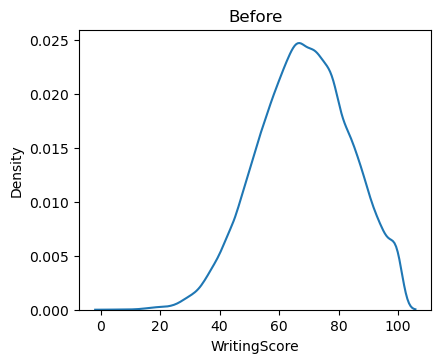

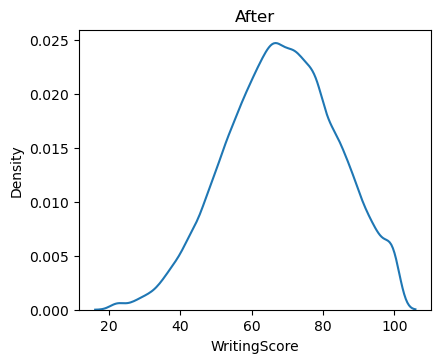

In [186]:
#Distribution of data before and after handling outlier:

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.kdeplot(data,x='WritingScore')
plt.title("Before")

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.kdeplot(df,x="WritingScore")
plt.title("After")